# Association Rules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
book=pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/9.Association Rules/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
#Highest grossing book genre
gross=pd.DataFrame(book.sum()).sort_values(0,ascending=False)
gross

,0
CookBks,862
ChildBks,846
DoItYBks,564
GeogBks,552
YouthBks,495
ArtBks,482
RefBks,429
ItalCook,227
Florence,217
ItalArt,97


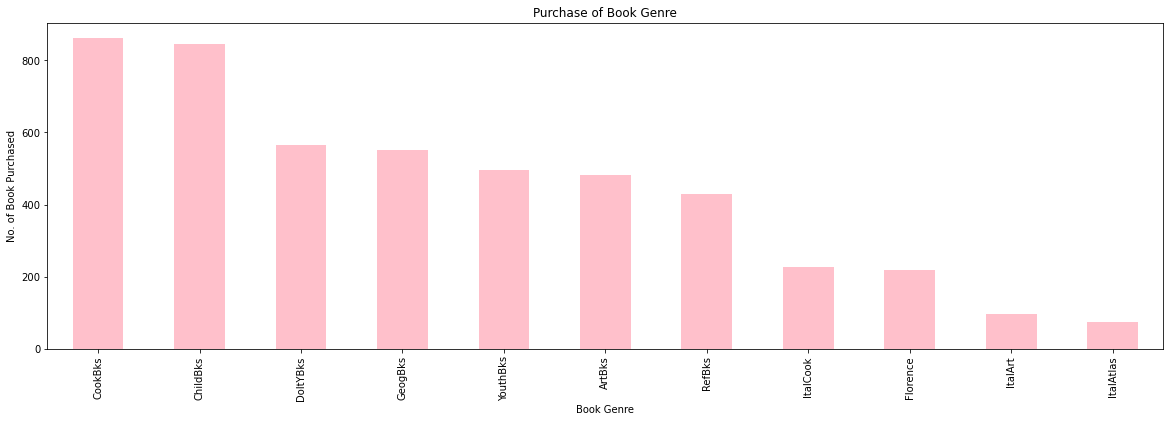

In [5]:
#bar plot of no. of books purchased
fig,ax = plt.subplots(figsize=(20,6))
gross.plot(kind="bar",color="pink",legend=False,ax=ax)
plt.xlabel("Book Genre")
plt.ylabel("No. of Book Purchased")
plt.title("Purchase of Book Genre")
plt.show();

## Apriori Algorithm
**Support - 0.1 & Lift - 1.2**

In [6]:
#Apriori Algorithm
apri1= apriori(book, min_support=0.1,use_colnames=True)
apri1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [7]:
# adding lift criteria
rule1 = association_rules(apri1, metric="lift", min_threshold=1.2)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


**It has been seen that most of the rules have lift value above 1**

In [8]:
rule1.sort_values("lift",ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
21,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
20,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


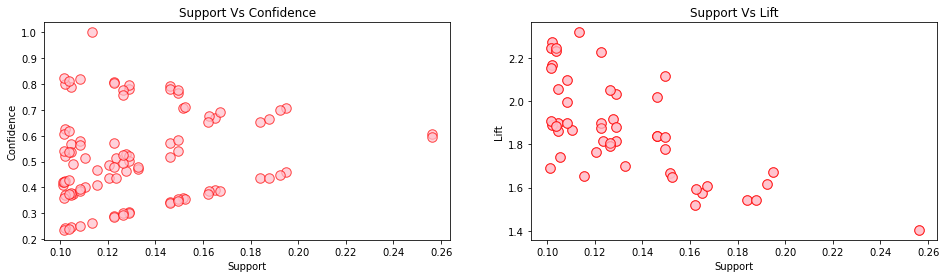

In [9]:
# visualization of obtained rule
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)  
plt.scatter(rule1["support"],rule1["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support Vs Confidence")

plt.subplot(1,2,2)
plt.scatter(rule1["support"],rule1["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("Support Vs Lift")

plt.show();

**Support - 0.11 & Lift - 1.5**

In [10]:
#Apriori Algorithm
apri2= apriori(book, min_support=0.11,use_colnames=True)
apri2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1650,"(YouthBks, ChildBks)"
9,0.2560,"(ChildBks, CookBks)"


In [11]:
# adding the lift criteria
rule2 = association_rules(apri2, metric="lift", min_threshold=1.5)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
59,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
60,"(CookBks, GeogBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081
61,(ChildBks),"(CookBks, GeogBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
62,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273


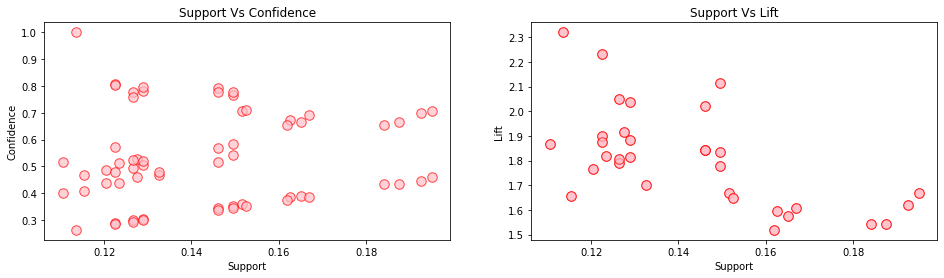

In [12]:
# visualization of obtained rule
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)  
plt.scatter(rule2["support"],rule2["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support Vs Confidence")

plt.subplot(1,2,2)
plt.scatter(rule2["support"],rule2["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("Support Vs Lift")

plt.show();

**Support - 0.13 & Lift - 1.8**

In [13]:
#Apriori Algorithm
apri3= apriori(book, min_support=0.13,use_colnames=True)
apri3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [14]:
# lift criteria
rule3 = association_rules(apri3, metric="lift", min_threshold=1.8)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
1,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
2,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
3,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
4,(ChildBks),"(DoItYBks, CookBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
5,(CookBks),"(DoItYBks, ChildBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
6,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
7,"(CookBks, GeogBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081
8,(ChildBks),"(CookBks, GeogBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
9,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273


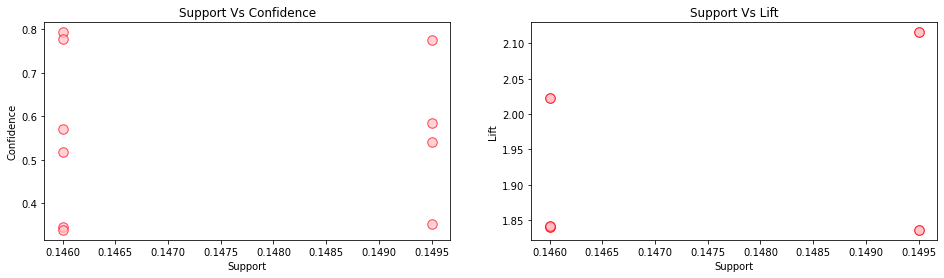

In [15]:
# visualization of obtained rule
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)  
plt.scatter(rule3["support"],rule3["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support Vs Confidence")

plt.subplot(1,2,2)
plt.scatter(rule3["support"],rule3["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("Support Vs Lift")

plt.show();

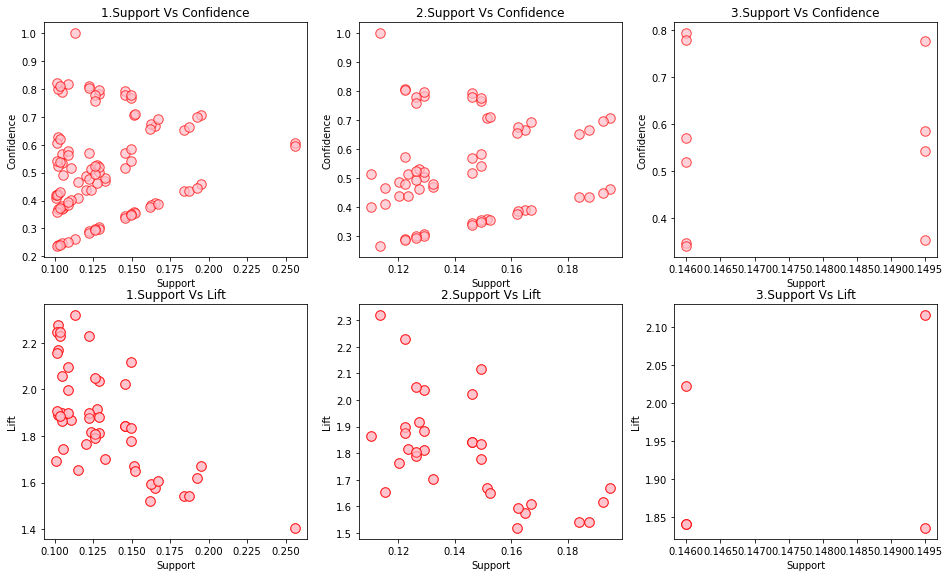

In [16]:
#all visuals at a look
fig = plt.figure(figsize=(16,9.5))

plt.subplot(2,3,1)
plt.scatter(rule1["support"],rule1["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Confidence")   
plt.title("1.Support Vs Confidence")

plt.subplot(2,3,2)
plt.scatter(rule2["support"],rule2["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Confidence")   
plt.title("2.Support Vs Confidence")

plt.subplot(2,3,3)
plt.scatter(rule3["support"],rule3["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Confidence")   
plt.title("3.Support Vs Confidence")

plt.subplot(2,3,4)
plt.scatter(rule1["support"],rule1["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("1.Support Vs Lift")

plt.subplot(2,3,5)
plt.scatter(rule2["support"],rule2["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("2.Support Vs Lift")

plt.subplot(2,3,6)
plt.scatter(rule3["support"],rule3["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("3.Support Vs Lift");

In [17]:
data = [[0.1,1.2],[0.11,1.5],[0.13,1.8]]
df = pd.DataFrame(data, columns=["Support", "Lift"])
df["Apriori"]=[len(apri1),len(apri2),len(apri3)]
df["Association_rules"]=[len(rule1),len(rule2),len(rule3)]
df

,Support,Lift,Apriori,Association_rules
0,0.10,1.2,39,100
1,0.11,1.5,31,64
2,0.13,1.8,21,10


**It is clearly visible that an increase in Support value results into less number of rules & increase in Lift value gives more accurate Association Rule.**